In [298]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
root_path = 'C://Users//HP//projects//DiplomaThesis'
sys.path.append(f'{root_path}')

from empyrical.stats import cum_returns 

from figures import Results, style_plot_df, corrplot, plot_df_simple, LatexFigure
from figures import NN_DICT, LocalIG, SORTING, SORTING_LATEX
from figures import plot_all_observations
from backtest import get_returns, get_metrics_all_models, get_returns_all_models
from backtest import get_nfirms_in_portfolios, returns_histogram
from backtest import plot_cumulative_returns, get_metrics_multiple_longshort, get_portfolios

%load_ext autoreload 
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [243]:
from data import Meta
meta = Meta()
meta.load()

# Performance (Ensembles)

In [199]:
r = Results(os.path.join("results", "selected", "ensembles"))
r.load()
pe = r.pe.groupby(r.ar.hidden_layers)["test_r_square", "test_mse", "test_mean_absolute_error", "test_root_mean_squared_error"].apply(np.mean)
pe.columns = ["R2", "MSE", "MAE", "RMSE"]
pe.index = [NN_DICT.get(s) for s in list(pe.index.values)]
pe = pe.transpose()
pe = pe*100
pe = pe.round(2)
pe

C:\Users\HP\Anaconda3\envs\ths\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,LR,NN1,NN2,NN3,NN4,NN5
R2,0.09,0.30,-0.32,-1.22,0.21,0.48
MSE,1.88,2.10,2.20,2.22,2.12,2.38
MAE,7.86,7.85,7.90,7.94,7.76,7.82
RMSE,13.63,13.62,13.66,13.71,13.67,13.61


# Performance on Simulated (Ensembles)

In [201]:
r = Results(os.path.join("results", "simulated", "ensembles"))
r.load(sort_features=False)
pe = r.pe.groupby(r.ar.hidden_layers)["test_r_square", "test_mse", "test_mean_absolute_error", "test_root_mean_squared_error"].apply(np.mean)
pe.columns = ["R2", "MSE", "MAE", "RMSE"]
pe.index = [NN_DICT.get(s) for s in list(pe.index.values)]
pe = pe.transpose()
pe = pe*100
pe = pe.round(2)
pe

C:\Users\HP\Anaconda3\envs\ths\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,LR,NN1,NN2,NN3,NN4,NN5
R2,95.87,80.69,87.09,96.49,36.52,93.24
MSE,0.02,9.78,9.82,12.81,11.16,8.54
MAE,1.08,2.63,2.17,0.94,5.09,1.46
RMSE,1.33,2.87,2.35,1.22,5.20,1.70


# Backtest

In [81]:
m_ls = get_metrics_multiple_longshort(path_to_models = "models/selected/ensembles", hidden_layers="32")

In [82]:
m_ls.round(3)

,0.5-0.5,1-1,5-5,10-10,20-20
Mean,0.075,0.064,0.031,0.021,0.014
Mean (Yearly),1.227,1.046,0.442,0.280,0.180
Standard Deviation,0.129,0.091,0.046,0.032,0.024
Sharpe Ratio,2.007,2.437,2.365,2.296,2.062
Skewness,0.978,1.623,1.968,2.036,2.223
Kurtosis,0.766,4.067,6.356,6.517,7.537
Max Drawdown,-0.267,-0.107,-0.059,-0.031,-0.026


In [101]:
get_nfirms_in_portfolios()

{'0.5': 23, '1': 47, '5': 238, '10': 477, '20': 956}

In [83]:
m = get_metrics_all_models(path_to_models = "models/selected/ensembles")
m.round(3)

,LR,NN1,NN2,NN3,NN4,NN5
Mean,0.014,0.021,0.021,0.019,0.020,0.021
Mean (Yearly),0.175,0.280,0.284,0.253,0.270,0.277
Standard Deviation,0.038,0.032,0.036,0.037,0.025,0.029
Sharpe Ratio,1.283,2.296,1.975,1.785,2.760,2.494
Skewness,2.166,2.036,-0.403,0.871,0.856,0.573
Kurtosis,8.663,6.517,1.034,1.215,1.150,1.943
Max Drawdown,-0.098,-0.031,-0.170,-0.092,-0.037,-0.103


In [44]:
r_all = get_returns_all_models(path_to_models = "models/selected/ensembles")

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


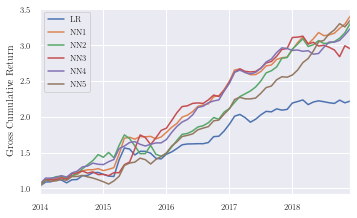

In [69]:
plot_cumulative_returns(r_all)

In [51]:
r_NN1 = get_returns(path_to_models = "models/selected/ensembles", hidden_layers="32")

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


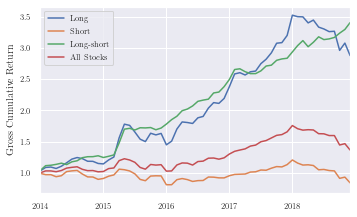

In [70]:
plot_cumulative_returns(r_NN1)

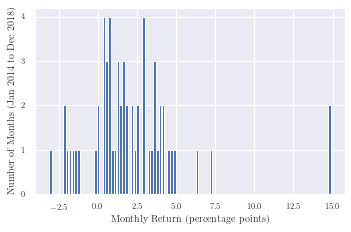

In [139]:
returns_histogram(r_NN1["Long-short"])

# Ensembles

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:250: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  """
C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:250: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  """
C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecation

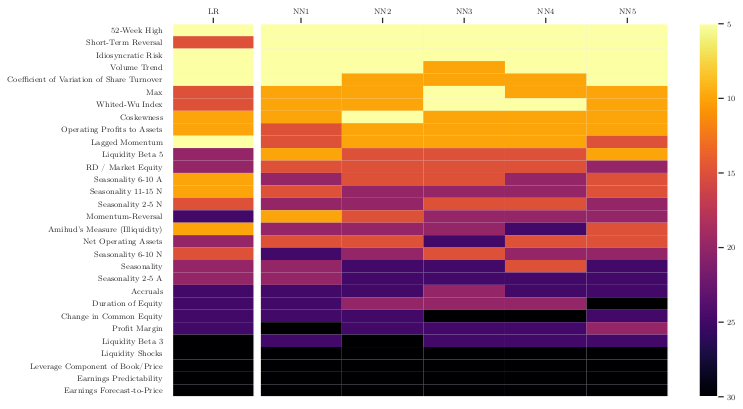

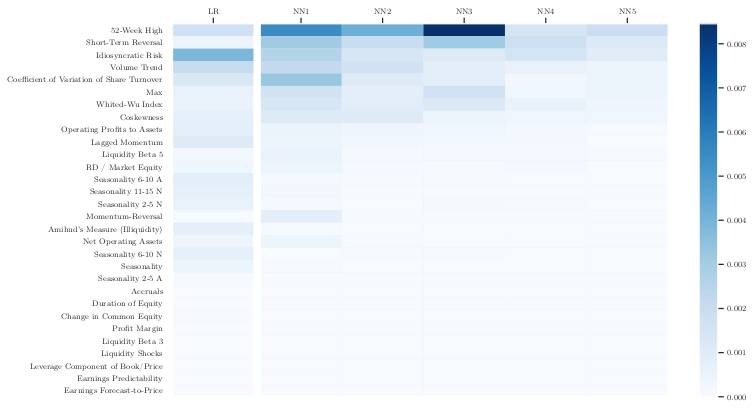

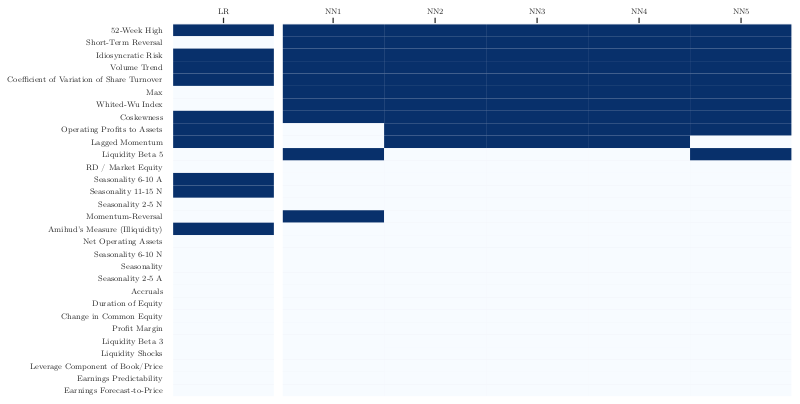

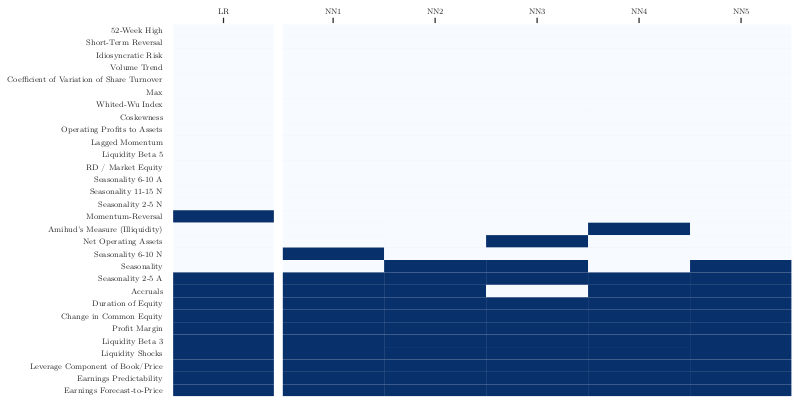

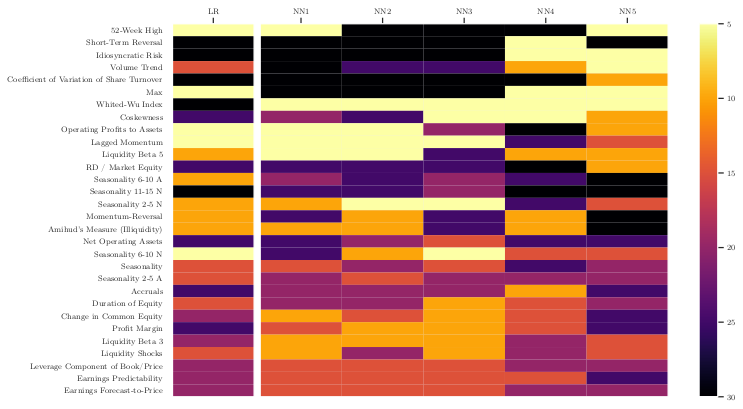

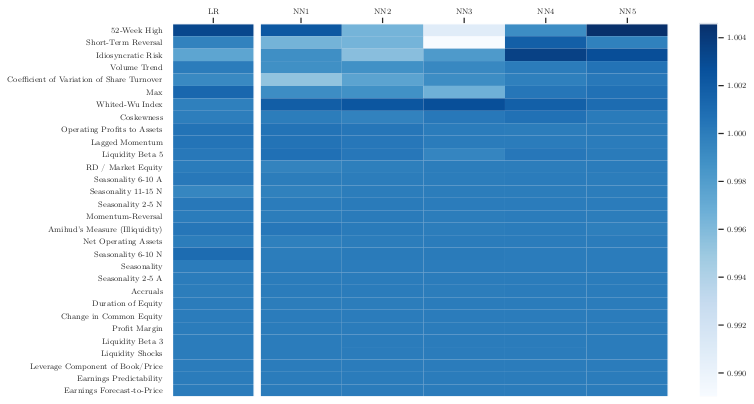

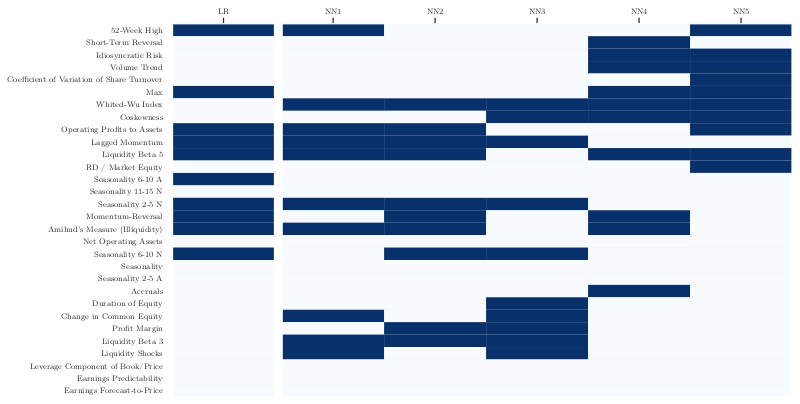

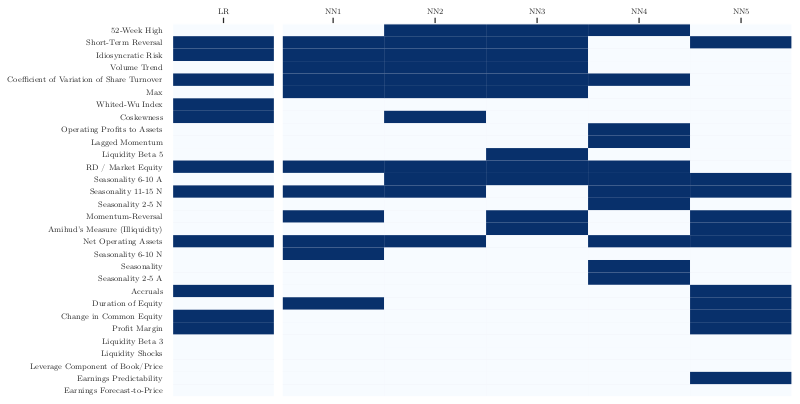

In [167]:
r = Results(os.path.join("results", "selected", "ensembles"))
r.load()
r.subset('ytrain',16)
r.rename(['nn_name'])

for styling in ["heatmap", "blues", "top", "bottom"]: 
    style_plot_df(r.ig.transpose(), styling=styling, mode='ensemble')

for styling in ["heatmap", "blues", "top", "bottom"]: 
    style_plot_df(r.mr.transpose(), styling=styling, mode='ensemble')

# Robustness of ensembles in time

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:236: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:236: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


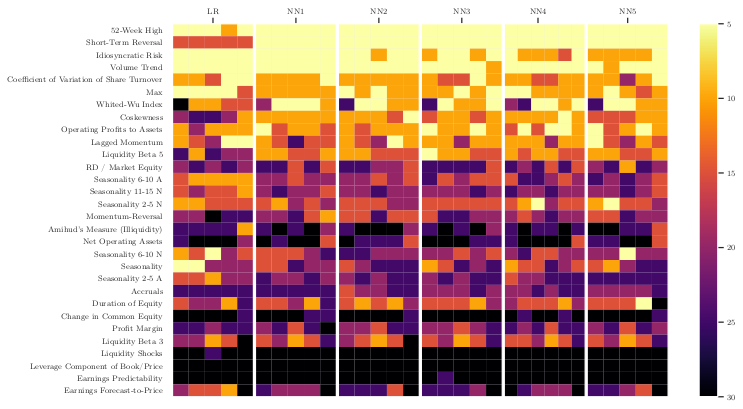

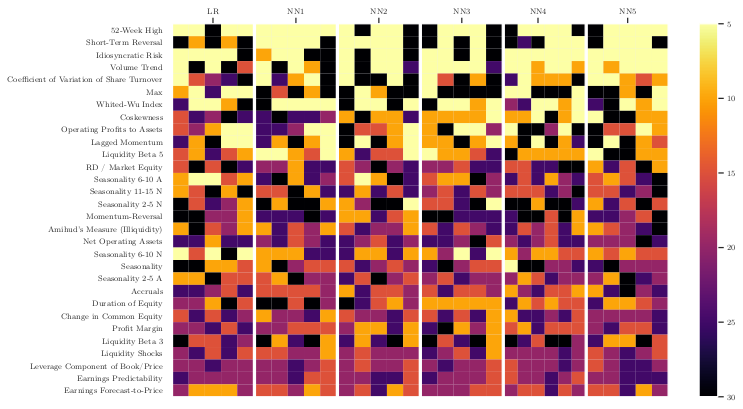

In [151]:
r = Results(os.path.join("results", "selected", "ensembles"))
r.load()
r.rename(['nn_name', "ytrain"])

for styling in ["heatmap"]: 
    style_plot_df(r.ig.transpose(), styling=styling, mode='ensemble_time')

for styling in ["heatmap"]: 
    style_plot_df(r.mr.transpose(), styling=styling, mode='ensemble_time')

# Seeds

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:236: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:236: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


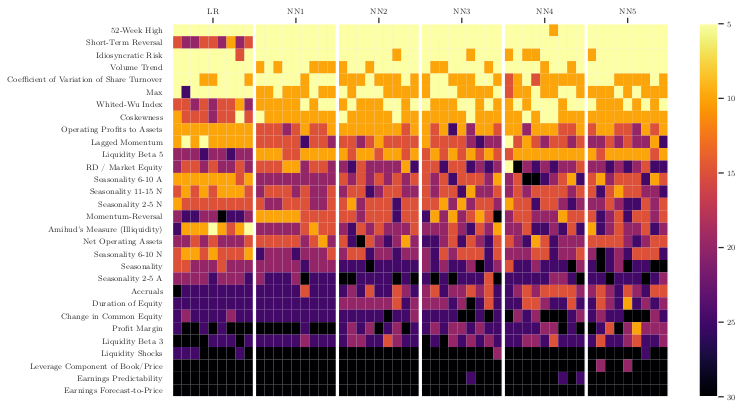

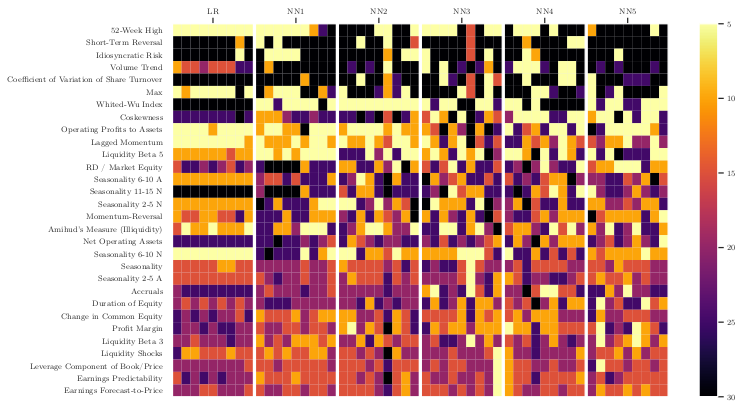

In [153]:
r = Results(os.path.join("results", "selected", "individual"))
r.load()
r.subset('ytrain',16)
r.rename(['nn_name', "seed"])

for styling in ["heatmap"]: 
    style_plot_df(r.ig.transpose(), styling=styling, mode='seeds')

for styling in ["heatmap"]: 
    style_plot_df(r.mr.transpose(), styling=styling, mode='seeds')

# Ensembles - simulations

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


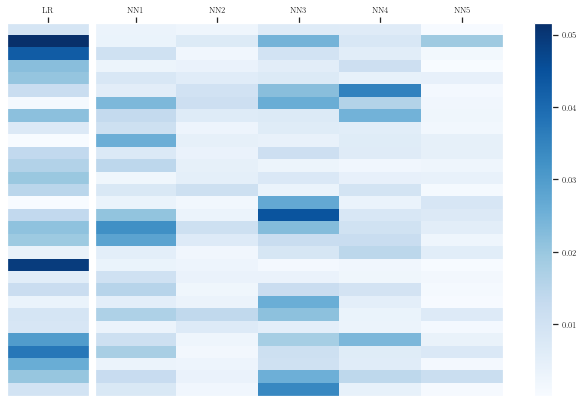

In [198]:
r = Results(os.path.join("results", "simulated", "ensembles"))
r.load(sort_features=False)
r.subset('ytrain',16)
r.rename(['nn_name'])

for styling in ["blues"]: 
    style_plot_df(r.ig.transpose(), styling=styling, mode='ensemble')
    #style_plot_df(r.mr.transpose(), styling=styling, mode='ensemble')

# Seeds - simulations

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


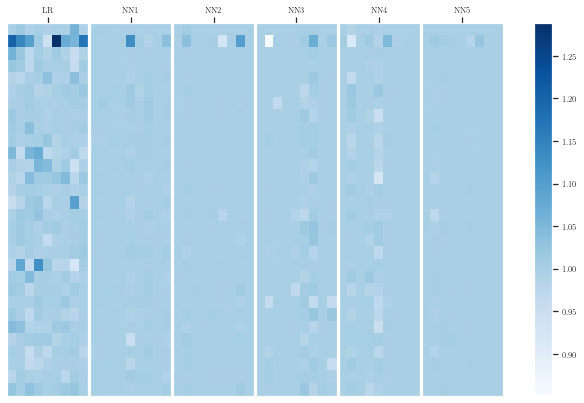

In [155]:
r = Results(os.path.join("results", "simulated", "individual"))
r.load(sort_features=False, suffix="_train")
r.subset('ytrain',16)
r.rename(['nn_name', "seed"])

for styling in ["blues"]: 
    #style_plot_df(r.ig.transpose(), styling=styling, mode='seeds')
    style_plot_df(r.mr.transpose(), styling=styling, mode='seeds')

# Local Integrated Gradients

In [ ]:
lig = LocalIG("models/selected/ensembles")

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:79: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


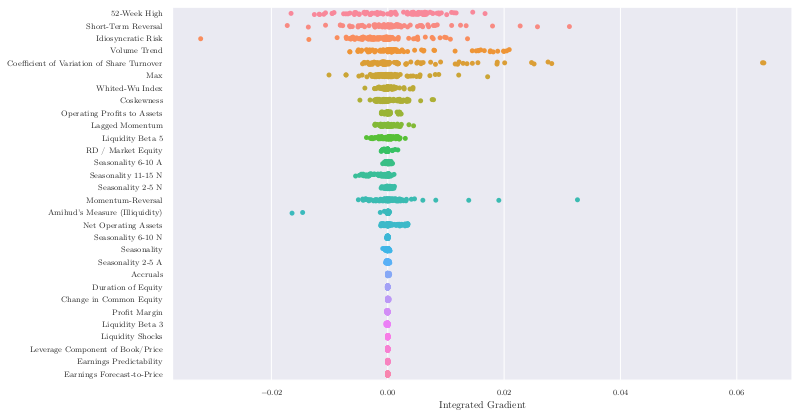

In [253]:
lig.load('y=16,y=12,y=1,hl=32,nm=9,o=adam')
lig.plot()

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:79: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


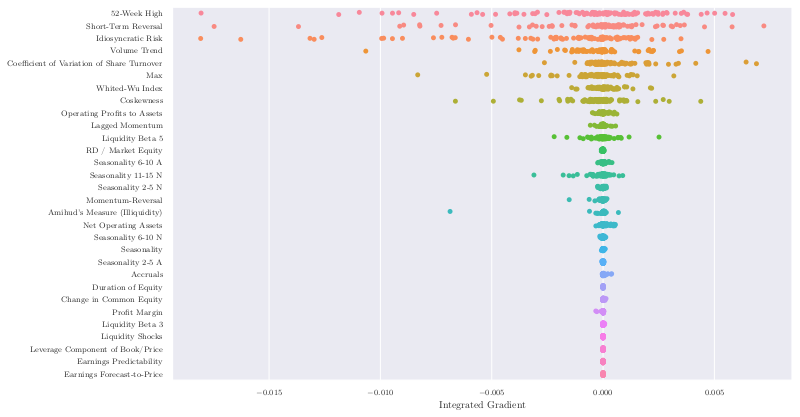

In [256]:
lig.load('y=16,y=12,y=1,hl=32,16,8,4,2,nm=9,o=adam')
lig.plot()

# Local Integrated Gradients (Simulated)

In [257]:
lig = LocalIG("models/simulated/ensembles")

C:\Users\HP\Anaconda3\Lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
C:\Users\HP\projects\DiplomaThesis\figures.py:79: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


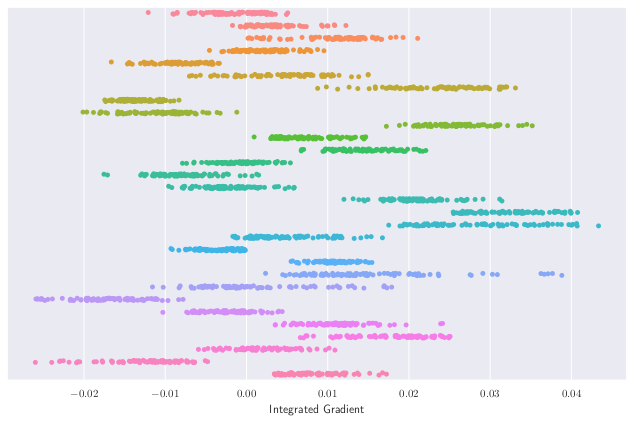

In [264]:
lig.load('y=16,y=12,y=1,hl=32,nm=9,o=adam', sort_features=False)
lig.plot()

### Why is MR and IG so different? 
IG is high for features whose **values** have big impact on the **value** of the prediction, if other features are at 0. (It **ignores the correlation** of the features.)

MR is high for features whose **distortion** worsens the **error** of the prediction relative to truth. It **takes into account the correlation** of the features.

The issue is the mirror of that in linear regression, coefficients of a variable (IG) can be big and yet the variable can be insignificant due to multicollinearity and a lot more features present (MR)

### MR and IG agree the more the deeper the model

In [15]:
from utils import get_orders
ar, mr, ig, pe = r.ar, r.mr, r.ig, r.pe
def compare_mr_ig(hidden_layers):
    df_mr = (mr.apply(lambda x: get_orders(x), axis=1)>=20)
    df_mr = name(
            ar, 
            subset_models(
                ar, df_mr, hidden_layers=hidden_layers, ytrain=16
            ).transpose(),
            ["nn_name"])
    df_ig = (ig.apply(lambda x: get_orders(x), axis=1)>=20)
    df_ig = name(
            ar, 
            subset_models(
                ar, df_ig, hidden_layers=hidden_layers, ytrain=16
            ).transpose(),
            ["nn_name"])
    df = pd.concat([df_ig,df_mr,],axis=1)
    df.columns = ["IG", "MR"]
    return df

overlap_top_10 = dict()
for hl in ["32","32,16","32,16,8", "32,16,8,4", "32,16,8,4,2"]:
    df = compare_mr_ig(hl)
    overlap_top_10[hl] = ((df.IG == True) & (df.MR == True)).sum()
print("overlap top 10 features:")
print(overlap_top_10)

plot_df_simple(
    compare_mr_ig("32"),
    cmap=plt.cm.Blues,
    show_cbar=False
)

plot_df_simple(
    compare_mr_ig("32,16,8,4,2"),
    cmap=plt.cm.Blues,
    vmin=0,
    show_cbar=False
)

NameError: name 'name' is not defined